# Homework 1 -- Python Demo

## 1. One Simulation

Generate two random points in $[0,1]^2$ and measure the distance between them. Visualize the two points and distance in a plot.

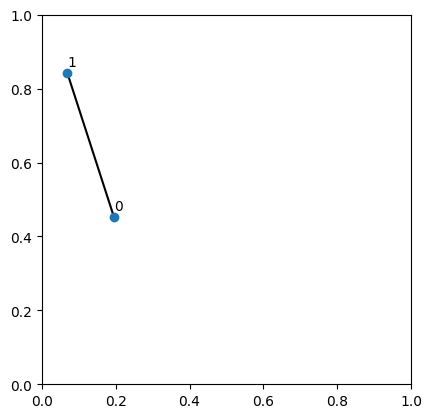

Some random points in [0, 1]^2 ([[x0, y0], [x1, y1]] format):
[[0.19556041 0.45221128]
 [0.06961892 0.84121469]]

Distance between point 0 and point 1 = 0.41


In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = np.random.random((2, 2))

_, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect(1.0)
ax.plot(p[:, 0], p[:, 1], c='black', zorder=0)
ax.scatter(p[:, 0], p[:, 1], zorder=1)
for i in range(2):
    ax.annotate(i, p[i] + (0, .02))
plt.show()

print('Some random points in [0, 1]^2 ([[x0, y0], [x1, y1]] format):')
print(p)
print()

d = np.linalg.norm(p[0] - p[1])
print(f'Distance between point 0 and point 1 = {d:.02g}')

## 2. Many Simulations, Averaged

Create a function that generates $n$ pairs of points in $[0,1]^2$, then computes the average distance between points in each pair.

In [2]:
def average_distance(n):
    points = np.random.random((2, n, 2))
    dists = np.linalg.norm(points[0] - points[1], axis=-1)
    return np.mean(dists)

Compute the average distance between $n = 10$ pairs of points several times to get a feel for how much variation is in the result. Then compute the standard deviation of $1000$ trials of this to quantify how much variation there is.

In [3]:
def test_variation(n, samples, trials):
    print('Sample average distances')
    for i in range(samples):
        print(f'Trial {i + 1}: {average_distance(n):.05f}')
    print()
    
    print(f'Standard deviation across 1000 trials: {np.std([average_distance(n) for _ in range(trials)]):.01g}')

test_variation(10, 8, 1000)

Sample average distances
Trial 1: 0.51201
Trial 2: 0.55479
Trial 3: 0.55803
Trial 4: 0.48931
Trial 5: 0.51548
Trial 6: 0.53464
Trial 7: 0.43219
Trial 8: 0.47154

Standard deviation across 1000 trials: 0.08


Now try the same experiment with $n=100$ and $n=1000$.

In [4]:
print('n = 100')
test_variation(100, 8, 1000)

print('n = 1000')
test_variation(1000, 8, 1000)

n = 100
Sample average distances
Trial 1: 0.56495
Trial 2: 0.46651
Trial 3: 0.52361
Trial 4: 0.50967
Trial 5: 0.49594
Trial 6: 0.51951
Trial 7: 0.55515
Trial 8: 0.54241

Standard deviation across 1000 trials: 0.02
n = 1000
Sample average distances
Trial 1: 0.52634
Trial 2: 0.53565
Trial 3: 0.53661
Trial 4: 0.51945
Trial 5: 0.53126
Trial 6: 0.53681
Trial 7: 0.52760
Trial 8: 0.51629

Standard deviation across 1000 trials: 0.008


As the Law of Large Numbers suggests, the variation decreases as we increase the sample size.

## 3. Using Arrays

By accepting an arbitrary array size instead of a number, we can vectorize `average_distance` to perform the tests from the previous section more quickly (maybe).

In [5]:
def fast_average_distance(size, axis=-1):
    points = np.random.random((2, *size, 2))
    dists = np.linalg.norm(points[0] - points[1], axis=-1)
    return np.mean(dists, axis=axis)


def fast_test_variation(n, samples, trials):
    print('Sample average distances')
    for i, dist in enumerate(fast_average_distance((samples, n))):
        print(f'Trial {i + 1}: {dist:.05f}')
    print()
    
    print(f'Standard deviation across 1000 trials: {np.std(fast_average_distance((trials, n))):.01g}')

for n in (10, 100, 1000):
    print(f'n = {n}')
    fast_test_variation(n, 8, 1000)
    print()

n = 10
Sample average distances
Trial 1: 0.44547
Trial 2: 0.52630
Trial 3: 0.72581
Trial 4: 0.37355
Trial 5: 0.49284
Trial 6: 0.54051
Trial 7: 0.55550
Trial 8: 0.48913

Standard deviation across 1000 trials: 0.08

n = 100
Sample average distances
Trial 1: 0.49222
Trial 2: 0.54244
Trial 3: 0.54764
Trial 4: 0.49708
Trial 5: 0.51651
Trial 6: 0.52239
Trial 7: 0.52928
Trial 8: 0.53479

Standard deviation across 1000 trials: 0.02

n = 1000
Sample average distances
Trial 1: 0.53920
Trial 2: 0.50981
Trial 3: 0.51943
Trial 4: 0.50955
Trial 5: 0.51972
Trial 6: 0.52090
Trial 7: 0.52576
Trial 8: 0.52101

Standard deviation across 1000 trials: 0.008



## 4. Timing Comparison

First, create a pure Python version of `average_distance` that will (hopefully) be really slow for large values of $n$.

In [6]:
import random

def super_slow_average_distance(n):
    s = 0
    
    for _ in range(n):
        p0x, p0y, p1x, p1y = [random.random() for __ in range(4)]
        s += ((p0x - p1x) ** 2 + (p0y - p1y) ** 2) ** .5
    
    return s / n

Second, compare `super_slow_average_distance` to `fast_average_distance` for various values of $n$. The `timeit` function times how long it takes to run a given function a given number of times. I choose the number of times so that the total amount of computation is roughly the same for each value of $n$.

In [7]:
from timeit import timeit

for logn in range(1, 7):
    n = 10 ** logn
    time_number = int(10 ** (6 - logn))
    print(f'n = {n}')
    print(f'Time for super slow method: {timeit(lambda: super_slow_average_distance(n), number=time_number):.02f}s')
    print(f'Time for fast method: {timeit(lambda: fast_average_distance((n,)), number=time_number):.02f}')
    print()

n = 10
Time for super slow method: 0.54s
Time for fast method: 0.61

n = 100
Time for super slow method: 0.48s
Time for fast method: 0.08

n = 1000
Time for super slow method: 0.56s
Time for fast method: 0.03

n = 10000
Time for super slow method: 0.50s
Time for fast method: 0.02

n = 100000
Time for super slow method: 0.50s
Time for fast method: 0.03

n = 1000000
Time for super slow method: 0.49s
Time for fast method: 0.03



For me, the fast method is, indeed, much faster, but __only for__ $n\ge 100$. Furthermore, the relative performance increase improves as $n$ gets larger (up to a point). Although array functions are faster when large arrays are involved, they are actually *slower* when small arrays are involved because there is an overhead for Python to interface with the native code that handles NumPy arrays.

## 5. A Convergence Table

Compute sample averages for successively larger values of $n$, comparing the current average to the previous to get an idea of how quickly the estimate of the true average distance converges as $n \to \infty$.

In [8]:
last_average_distance = 0
for logn in range(1, 7):
    n = 10 ** logn
    current_average_distance = average_distance(n)
    print(f'n = {n}. Current average: {current_average_distance:.05f}, delta: {abs(current_average_distance - last_average_distance):.05f}')
    
    last_average_distance = current_average_distance

n = 10. Current average: 0.38407, delta: 0.38407
n = 100. Current average: 0.51885, delta: 0.13477
n = 1000. Current average: 0.51253, delta: 0.00632
n = 10000. Current average: 0.52204, delta: 0.00951
n = 100000. Current average: 0.52143, delta: 0.00061
n = 1000000. Current average: 0.52121, delta: 0.00022


## 6. Creating a Histogram

Create a histogram of a sample of $n = 10000$ distances.

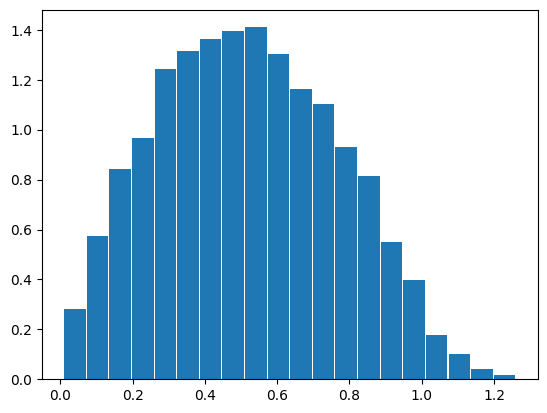

In [9]:
points = np.random.random((2, 10000, 2))
dists = np.linalg.norm(points[0] - points[1], axis=-1)

_, ax = plt.subplots()
ax.hist(dists, bins=20, rwidth=0.95, density=True)
plt.show()

## 7. Histogram Versus PDF

Since the PDF of the distance is known explicitly for this problem, we can compare it with the histogram of the distances.

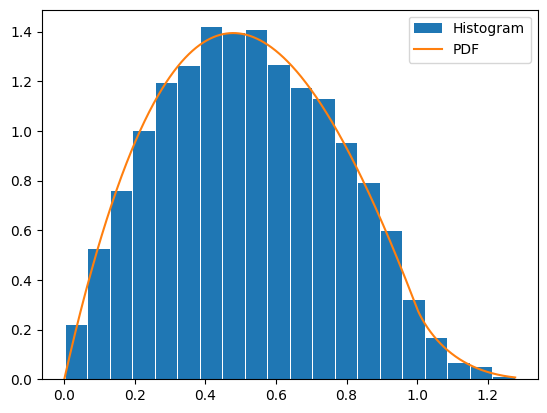

In [10]:
points = np.random.random((2, 10000, 2))
dists = np.linalg.norm(points[0] - points[1], axis=-1)

def pdf(distances):
    p = np.empty_like(distances)
    
    le1 = (distances <= 1)
    d = distances[le1]
    p[le1] = 2 * d * (d ** 2 - 4 * d + np.pi)

    gt1 = (distances > 1)
    d = distances[gt1]
    p[gt1] = 2 * d * (4 * np.sqrt(d ** 2 - 1) - (d ** 2 + 2 - np.pi) - 4 * np.arctan(np.sqrt(d ** 2 - 1)))
    
    return p

_, ax = plt.subplots()
ax.hist(dists, bins=20, rwidth=0.95, density=True, label='Histogram')

distance_samples = np.linspace(0, np.max(dists), 1000)
ax.plot(distance_samples, pdf(distance_samples), label='PDF')

ax.legend()
plt.show()